# Load Libraries and Datasets

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns

In [2]:
url = 'data/tfresults02.csv'
raw_data = pd.read_csv(url, error_bad_lines=False)
raw_data

,Year,Event,Division,Gender,School,Name,Position,Timing(s)
0,2002,100 Metres,A,Boys,RJC,Benjamin Ang Fu Hong,1,11.14
1,2002,100 Metres,A,Boys,VJC,Teng Wei Yang Alexander,2,11.32
2,2002,100 Metres,A,Boys,RJC,Lee Weijie,3,11.49
3,2002,100 Metres,A,Boys,AJC,Tay Chi Wai Dennis,4,11.55
4,2002,100 Metres,A,Boys,NJC,Fong Zhi Guang,5,11.57
5,2002,100 Metres,A,Boys,ACJC,Shoon Ming Hui,6,11.59
6,2002,100 Metres,A,Boys,CJC,Rajbir Singh Chopra,7,11.70
7,2002,100 Metres,A,Boys,JI,Mohamed Effin Bin Jamalludin,8,12.32
8,2002,200 Metres,A,Boys,AJC,Muhd Firdaus Bin Juhari,1,22.54
9,2002,200 Metres,A,Boys,RJC,Benjamin Ang Fu Hong,2,22.80


# How the Values Compare to Each Other

## Among Categories

### Column Chart

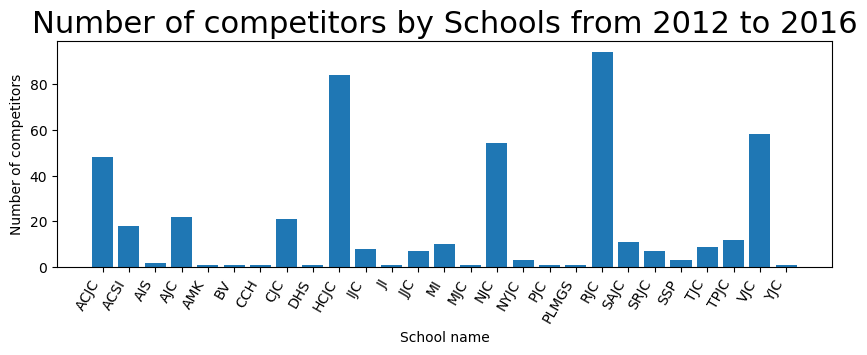

In [3]:
# Prepare Data
df = raw_data.groupby('School').size().reset_index(name='counts')
random.seed(100)

# Plot Bars
plt.figure(figsize=(10,3), dpi= 100)
plt.bar(df['School'], df['counts'], width=0.8)

# Decoration
plt.gca().set_xticklabels(df['School'], rotation=60, horizontalalignment= 'right')
plt.title('Number of competitors by Schools from 2012 to 2016', fontsize=22)
plt.xlabel('School name')
plt.ylabel('Number of competitors')

plt.show()

### Grouped Column

In [4]:
def get_boys_girls():
    boys = []
    girls = []

    df = raw_data.groupby(['School', 'Gender']).size().reset_index(name='counts')
    
    labels = np.unique(raw_data['School'])
    for school in labels:
        value = df[(df['School'] == school) & (df['Gender'] == 'Boys')]['counts'].values
        if len(value) == 0:
            boys.append(0)
        else:
            boys.append(value[0])

    for school in labels:
        value = df[(df['School'] == school) & (df['Gender'] == 'Girls')]['counts'].values
        if len(value) == 0:
            girls.append(0)
        else:
            girls.append(value[0])
    
    return boys, girls

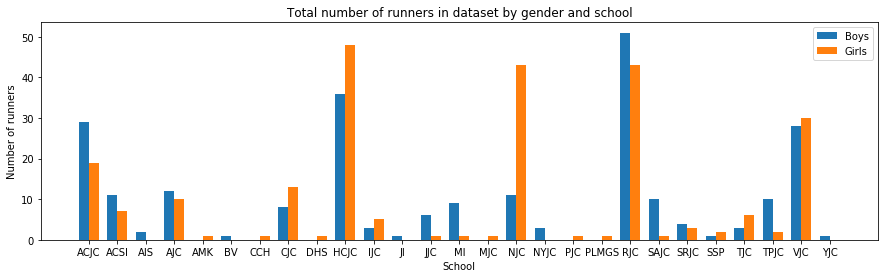

In [5]:
# Prepare data

labels = list(df['School'])
# gender_labels = list(raw_data.groupby(['Gender']).groups.keys())
gender_labels = np.unique(raw_data['Gender'])

boys, girls = get_boys_girls()
        
# print(labels)
# print(boys)
# print(girls)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,4))
rects1 = ax.bar(x - width/2, boys, width, label='Boys')
rects2 = ax.bar(x + width/2, girls, width, label='Girls')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Total number of runners in dataset by gender and school')
ax.set_xlabel('School')
ax.set_ylabel('Number of runners')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()        

### Bar Chart

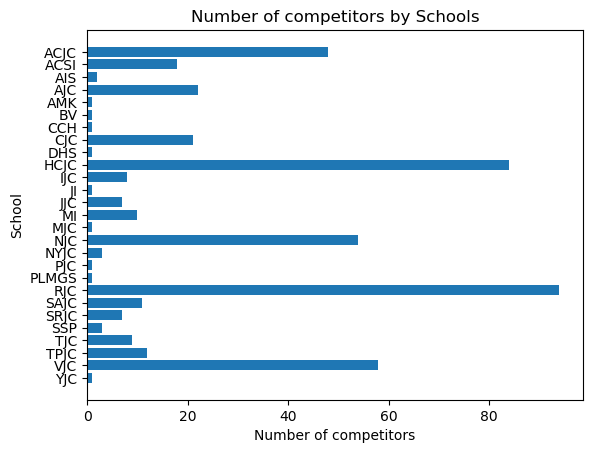

In [6]:
plt.rcdefaults()
fig, ax = plt.subplots()

school_names = df['School']

y_pos = np.arange(len(school_names))
performance = df['counts']

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(school_names)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_title('Number of competitors by Schools')
ax.set_xlabel('Number of competitors')
ax.set_ylabel('School')

plt.show()

## Over time

### Line Chart

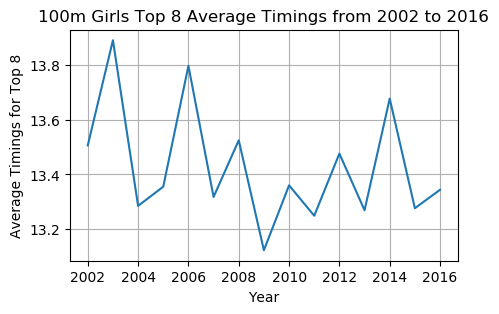

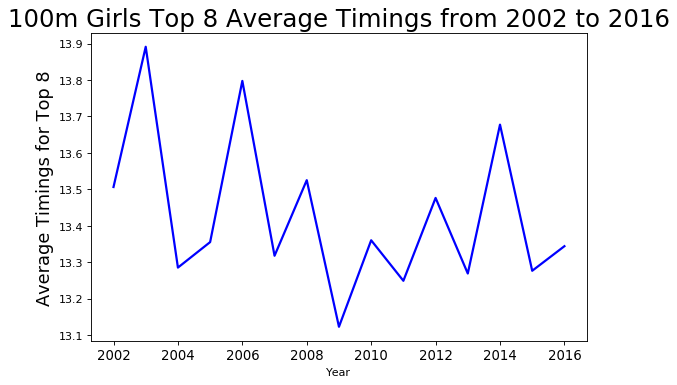

In [7]:
# Method 1

# Prepare Data
girls_100m = pd.DataFrame(raw_data[(raw_data['Event'] == '100 Metres ') & (raw_data['Gender'] == 'Girls')].groupby(['Year'])['Timing(s)'].mean()).reset_index()
# print(girls_100m)

years = list(girls_100m['Year'])
girls_100m_mean_timings = list(girls_100m['Timing(s)'])

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(years, girls_100m_mean_timings)

ax.set_title('100m Girls Top 8 Average Timings from 2002 to 2016')
ax.set_xlabel('Year')
ax.set_ylabel('Average Timings for Top 8')

ax.grid()

plt.show()

# Method 2

# Plot
plt.figure(figsize=(8,5), dpi= 80)
plt.ylabel("# Orders", fontsize=16)  
x = years
plt.plot(x, girls_100m_mean_timings, color="blue", lw=2) 

# Decorations
plt.xticks(x[::2], [str(d) for d in x[::2]] , fontsize=12)
plt.title("100m Girls Top 8 Average Timings from 2002 to 2016", fontsize=22)
plt.xlabel("Year")
plt.ylabel("Average Timings for Top 8")

plt.show()

### Overlay Line

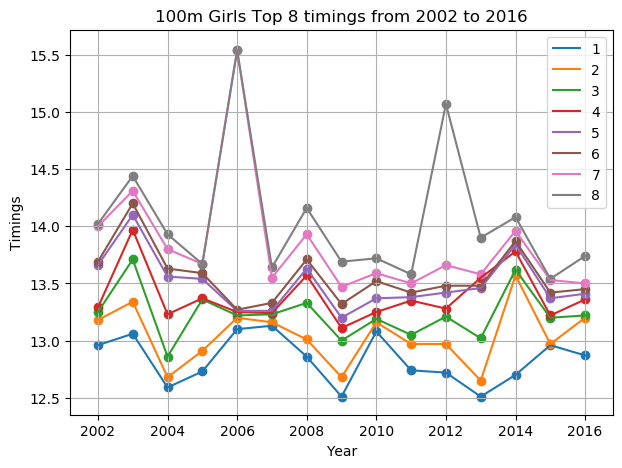

In [8]:
list_girls_100m = []

for i in range(1, 9):
    list_girls_100m.append(list(raw_data[(raw_data['Event'] == '100 Metres ') & (raw_data['Gender'] == 'Girls') & (raw_data['Position'] == i)]['Timing(s)']))

fig, ax = plt.subplots(figsize=(7,5))

position = list(range(8))

for i in position:
    ax.plot(years, list_girls_100m[i], label=str(i+1)) # years is from previous graph
    ax.scatter(years, list_girls_100m[i])

ax.set_title('100m Girls Top 8 timings from 2002 to 2016')
ax.set_xlabel('Year')
ax.set_ylabel('Timings')

ax.legend()
ax.grid()

plt.show()

# How the Data is Distributed

### Box Plot

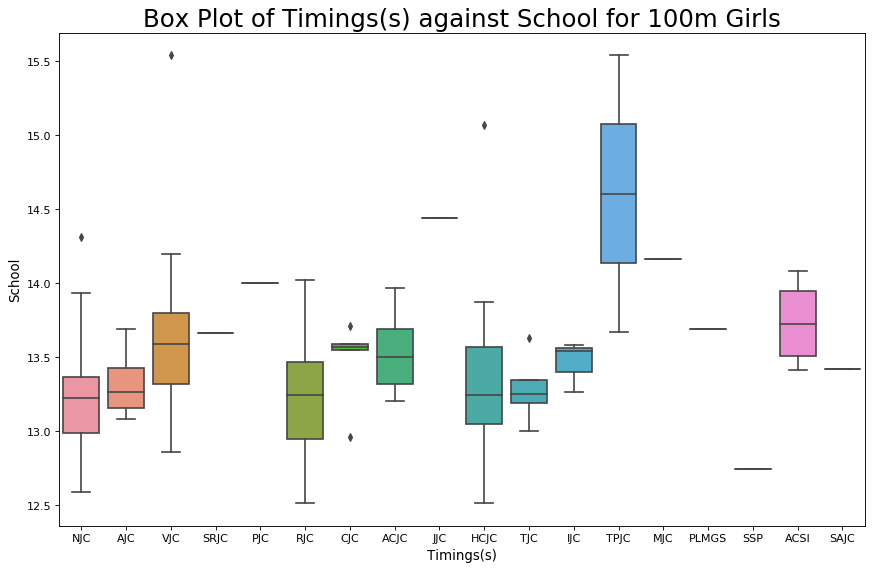

In [9]:
# Draw Plot
plt.figure(figsize=(13,8), dpi= 80)
sns.boxplot(x='School', y='Timing(s)', data=raw_data[(raw_data['Event'] == '100 Metres ') & (raw_data['Gender'] == 'Girls')], notch=False)

# Decoration
plt.title('Box Plot of Timings(s) against School for 100m Girls', fontsize=22)
plt.xlabel("Timings(s)", fontsize=12)
plt.ylabel("School", fontsize=12)

plt.show()

### Column Historgram

(array([ 1.,  4.,  3.,  4.,  2.,  5., 10.,  6.,  6., 10.,  9.,  5.,  6.,
         9.,  4.]),
 array([2002.        , 2002.93333333, 2003.86666667, 2004.8       ,
        2005.73333333, 2006.66666667, 2007.6       , 2008.53333333,
        2009.46666667, 2010.4       , 2011.33333333, 2012.26666667,
        2013.2       , 2014.13333333, 2015.06666667, 2016.        ]),
 <a list of 15 Patch objects>)

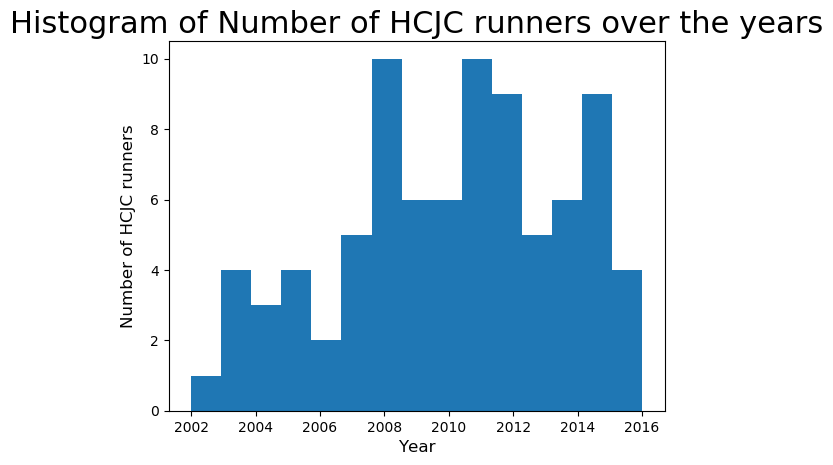

In [10]:
HCJC_runners = raw_data[(raw_data['School'] == 'HCJC')]
counts = np.array(HCJC_runners.groupby('Year')['Name'].count())
bins = years

plt.title('Histogram of Number of HCJC runners over the years', fontsize=22)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of HCJC runners", fontsize=12)

plt.hist(bins, bins=len(bins), weights=counts)

### Scatter Plot

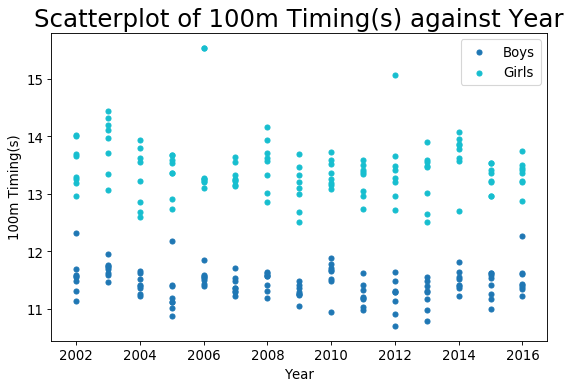

In [11]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

both_genders_100m = raw_data[raw_data['Event'] == '100 Metres ']
# print(both_genders_100m)
# gender_labels # Previously defined

colors = [plt.cm.tab10(i/float(len(gender_labels)-1)) for i in range(len(gender_labels))]
plt.figure(figsize=(8, 5), dpi= 80)

for i, gender in enumerate(gender_labels):
    plt.scatter('Year', 'Timing(s)', 
                data=both_genders_100m.loc[both_genders_100m.Gender==gender, :], 
                s=20, c=colors[i], label=str(gender))

plt.xticks(fontsize=12); plt.yticks(fontsize=12)

plt.title("Scatterplot of 100m Timing(s) against Year", fontsize=22)
plt.xlabel("Year", fontsize=12)
plt.ylabel("100m Timing(s)", fontsize=12)

plt.legend(fontsize=12)    
plt.show()    

# How the Data is Composed

## Two Dimensions

### Stacked Percent

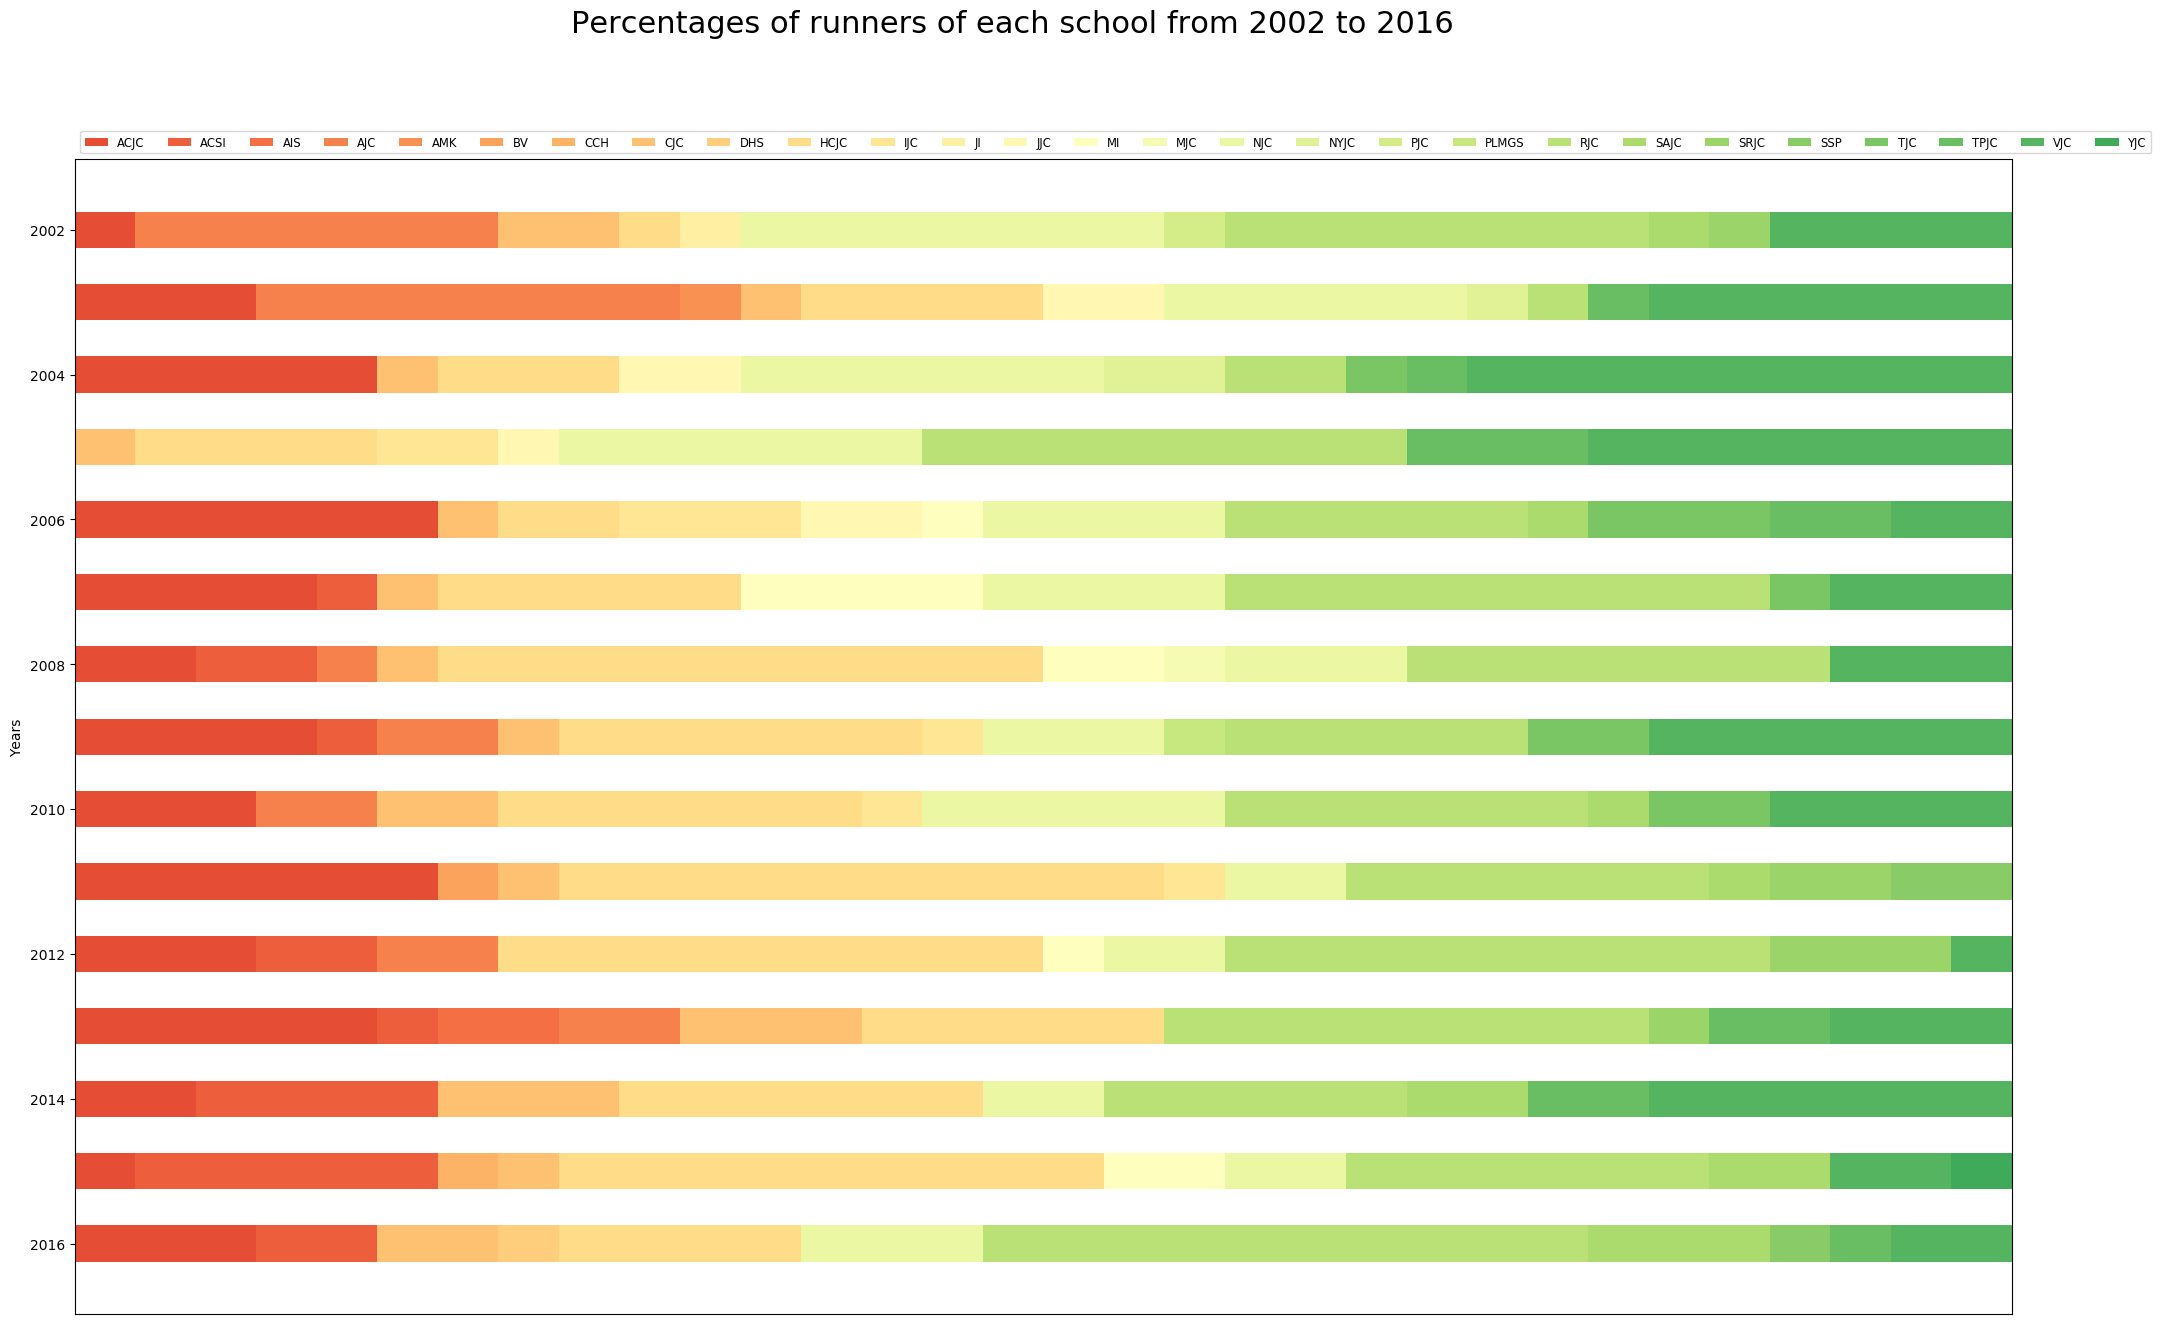

In [12]:
results = {}

for year in years:
    list_school_runner_counts = []
    schools_in_year = raw_data[(raw_data['Year'] == year)].groupby(['School'])['Name'].count().reset_index()
    for school in school_names:
        if school in list(schools_in_year['School']):
            list_school_runner_counts.append(schools_in_year[schools_in_year['School'] == school]['Name'].values[0])
            continue
        list_school_runner_counts.append(0)
    results[year] = list_school_runner_counts

# print(results)
        
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(
    np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(25, 15))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(school_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2
ax.legend(ncol=len(school_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='small')

fig.suptitle('Percentages of runners of each school from 2002 to 2016', fontsize = 22)
ax.set_xlabel('School')
ax.set_ylabel('Years')

plt.show()

### Stacked Column

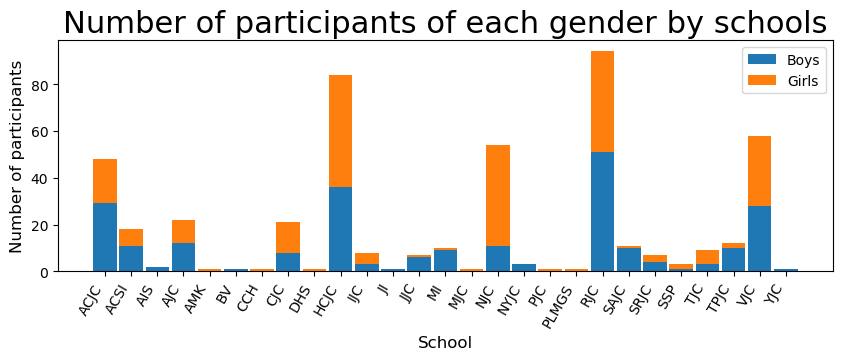

In [13]:
N = len(school_names) # school_names is from previous graph
ind = np.arange(N)    # the x locations for the groups
width = 0.9     # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(10,3), dpi= 100)

boys, girls = get_boys_girls()



p1 = plt.bar(ind, boys, width) # Boys is defined previously
p2 = plt.bar(ind, girls, width, # Girls is defined previously
             bottom=boys)

plt.title('Number of participants of each gender by schools', fontsize=22)
plt.xlabel('School', fontsize=12)
plt.ylabel('Number of participants', fontsize=12)

plt.xticks(ind, school_names)
plt.gca().set_xticklabels(df['School'], rotation=60, horizontalalignment= 'right')

plt.legend((p1[0], p2[0]), ('Boys', 'Girls'))

plt.show()

## Over Time

### Area Chart

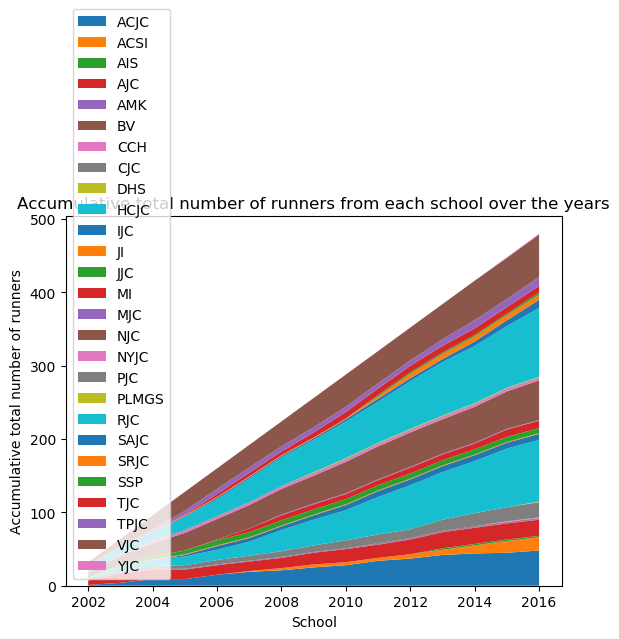

In [14]:
results = {}

names = []

# get total number of runners in each school for each year.
for school in school_names:
    total_runners_over_years = []
    school_data = raw_data[(raw_data['School'] == school)]
    total_tab = 0
    for year in years:
        runners_in_year = school_data[school_data['Year'] == year]['Name'].count()
        total_tab = total_tab + runners_in_year
        total_runners_over_years.append(total_tab)
    results[school] = total_runners_over_years
# print(results)

x = years
y = np.vstack(list(results.values()))
labels = school_names

fig, ax = plt.subplots()
ax.stackplot(x, results['ACJC'], results['ACSI'], results['AIS'], results['AJC'], results['AMK'], results['BV'], results['CCH'], results['CJC'], results['DHS'], results['HCJC'], results['IJC'], results['JI'], results['JJC'], results['MI'], results['MJC'], results['NJC'], results['NYJC'], results['PJC'], results['PLMGS'], results['RJC'], results['SAJC'], results['SRJC'], results['SSP'], results['TJC'], results['TPJC'], results['VJC'], results['YJC'], labels=labels)
ax.legend(loc='lower left')

ax.set_title('Accumulative total number of runners from each school over the years')
ax.set_xlabel('School')
ax.set_ylabel('Accumulative total number of runners')

plt.show()